## Adventure Insured: Predicting Claims



> The dataset consists of 9,267 rows and 11 columns. It includes various features related to travel insurance policies and claim outcomes, such as policy information, customer demographics, and claim details. The potential of this project lies in its ability to predict claim outcomes using advanced machine learning models. By identifying key patterns and predictors of claims, insurance companies can enhance risk assessment, improve customer service, and optimize their decision-making processes.

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv("insurance_part2_data-2.csv")
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [52]:
print("Number of rows:", df.shape[0], "\nNumber of Columns",df.shape[1])


Number of rows: 3000 
Number of Columns 10


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [54]:
df.describe()


,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


- The age group is relatively young, with an average age of 38.09 years old.
- There is a wide range of commission rates, with the lowest commission rate being 0% and the highest commission rate being 210.21%.
- The average duration is 70.01 minutes, but there is a wide range of durations, with the shortest lasting 1 minute and the longest lasting 4580 minutes.
- The average sales amount is 60.25, but there is a fair amount of variability in the sales amounts, with the lowest sales amount being 0 and the highest sales amount being 539.

In [55]:
df.duplicated().sum()


139

In [56]:
df[df.duplicated()]


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [57]:
df.drop(columns=['Agency_Code','Age'],axis=1,inplace=True)


In [58]:
df1=df[['Commision','Sales','Duration']]
df1.head()


,Commision,Sales,Duration
0,0.70,2.51,7
1,0.00,20.00,34
2,5.94,9.90,3
3,0.00,26.00,4
4,6.30,18.00,53


In [59]:
from scipy.stats import zscore
df1=df1.apply(zscore)
df1.head()

,Commision,Sales,Duration
0,-0.542807,-0.816433,-0.470051
1,-0.570282,-0.569127,-0.268605
2,-0.337133,-0.711940,-0.499894
3,-0.570282,-0.484288,-0.492433
4,-0.323003,-0.597407,-0.126846


In [60]:
for col in df1.columns:
    df1[col]=np.where(df1[col] > 3,3,df1[col] )
    df1[col]=np.where(df1[col] < -3,-3,df1[col] )

In [61]:
df1[['Type','Claimed','Channel','Product Name','Destination']]=df[['Type','Claimed','Channel','Product Name','Destination']]

In [62]:
df1.head()


,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,Airlines,No,Online,Customised Plan,ASIA
1,-0.570282,-0.569127,-0.268605,Travel Agency,No,Online,Customised Plan,ASIA
2,-0.337133,-0.711940,-0.499894,Travel Agency,No,Online,Customised Plan,Americas
3,-0.570282,-0.484288,-0.492433,Travel Agency,No,Online,Cancellation Plan,ASIA
4,-0.323003,-0.597407,-0.126846,Airlines,No,Online,Bronze Plan,ASIA


In [63]:
df.columns


Index(['Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

In [65]:
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i]=pd.Categorical(df1[i]).codes

In [66]:
df1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,0,0,1,2,0
1,-0.570282,-0.569127,-0.268605,1,0,1,2,0
2,-0.337133,-0.711940,-0.499894,1,0,1,2,1
3,-0.570282,-0.484288,-0.492433,1,0,1,1,0
4,-0.323003,-0.597407,-0.126846,0,0,1,0,0


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commision     3000 non-null   float64
 1   Sales         3000 non-null   float64
 2   Duration      3000 non-null   float64
 3   Type          3000 non-null   int8   
 4   Claimed       3000 non-null   int8   
 5   Channel       3000 non-null   int8   
 6   Product Name  3000 non-null   int8   
 7   Destination   3000 non-null   int8   
dtypes: float64(3), int8(5)
memory usage: 85.1 KB


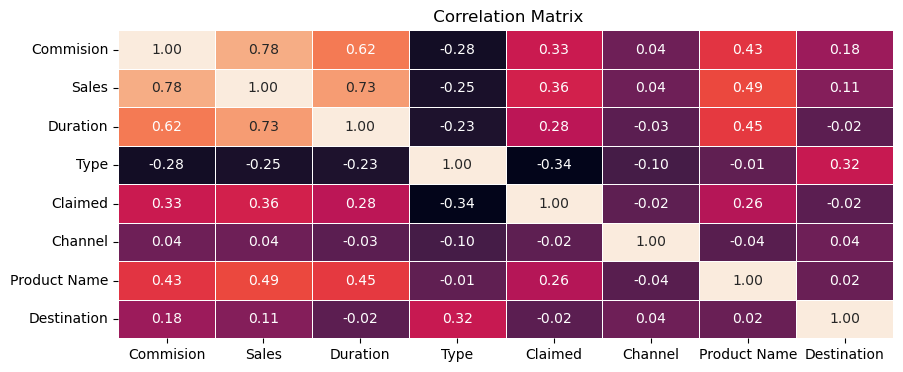

In [68]:
#Correlation heatmap
corr = df1.corr(method='pearson')
fig = plt.subplots(figsize=(10, 4))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, linewidth=0.5)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title(' Correlation Matrix')
plt.show()

<Figure size 1000x1000 with 0 Axes>

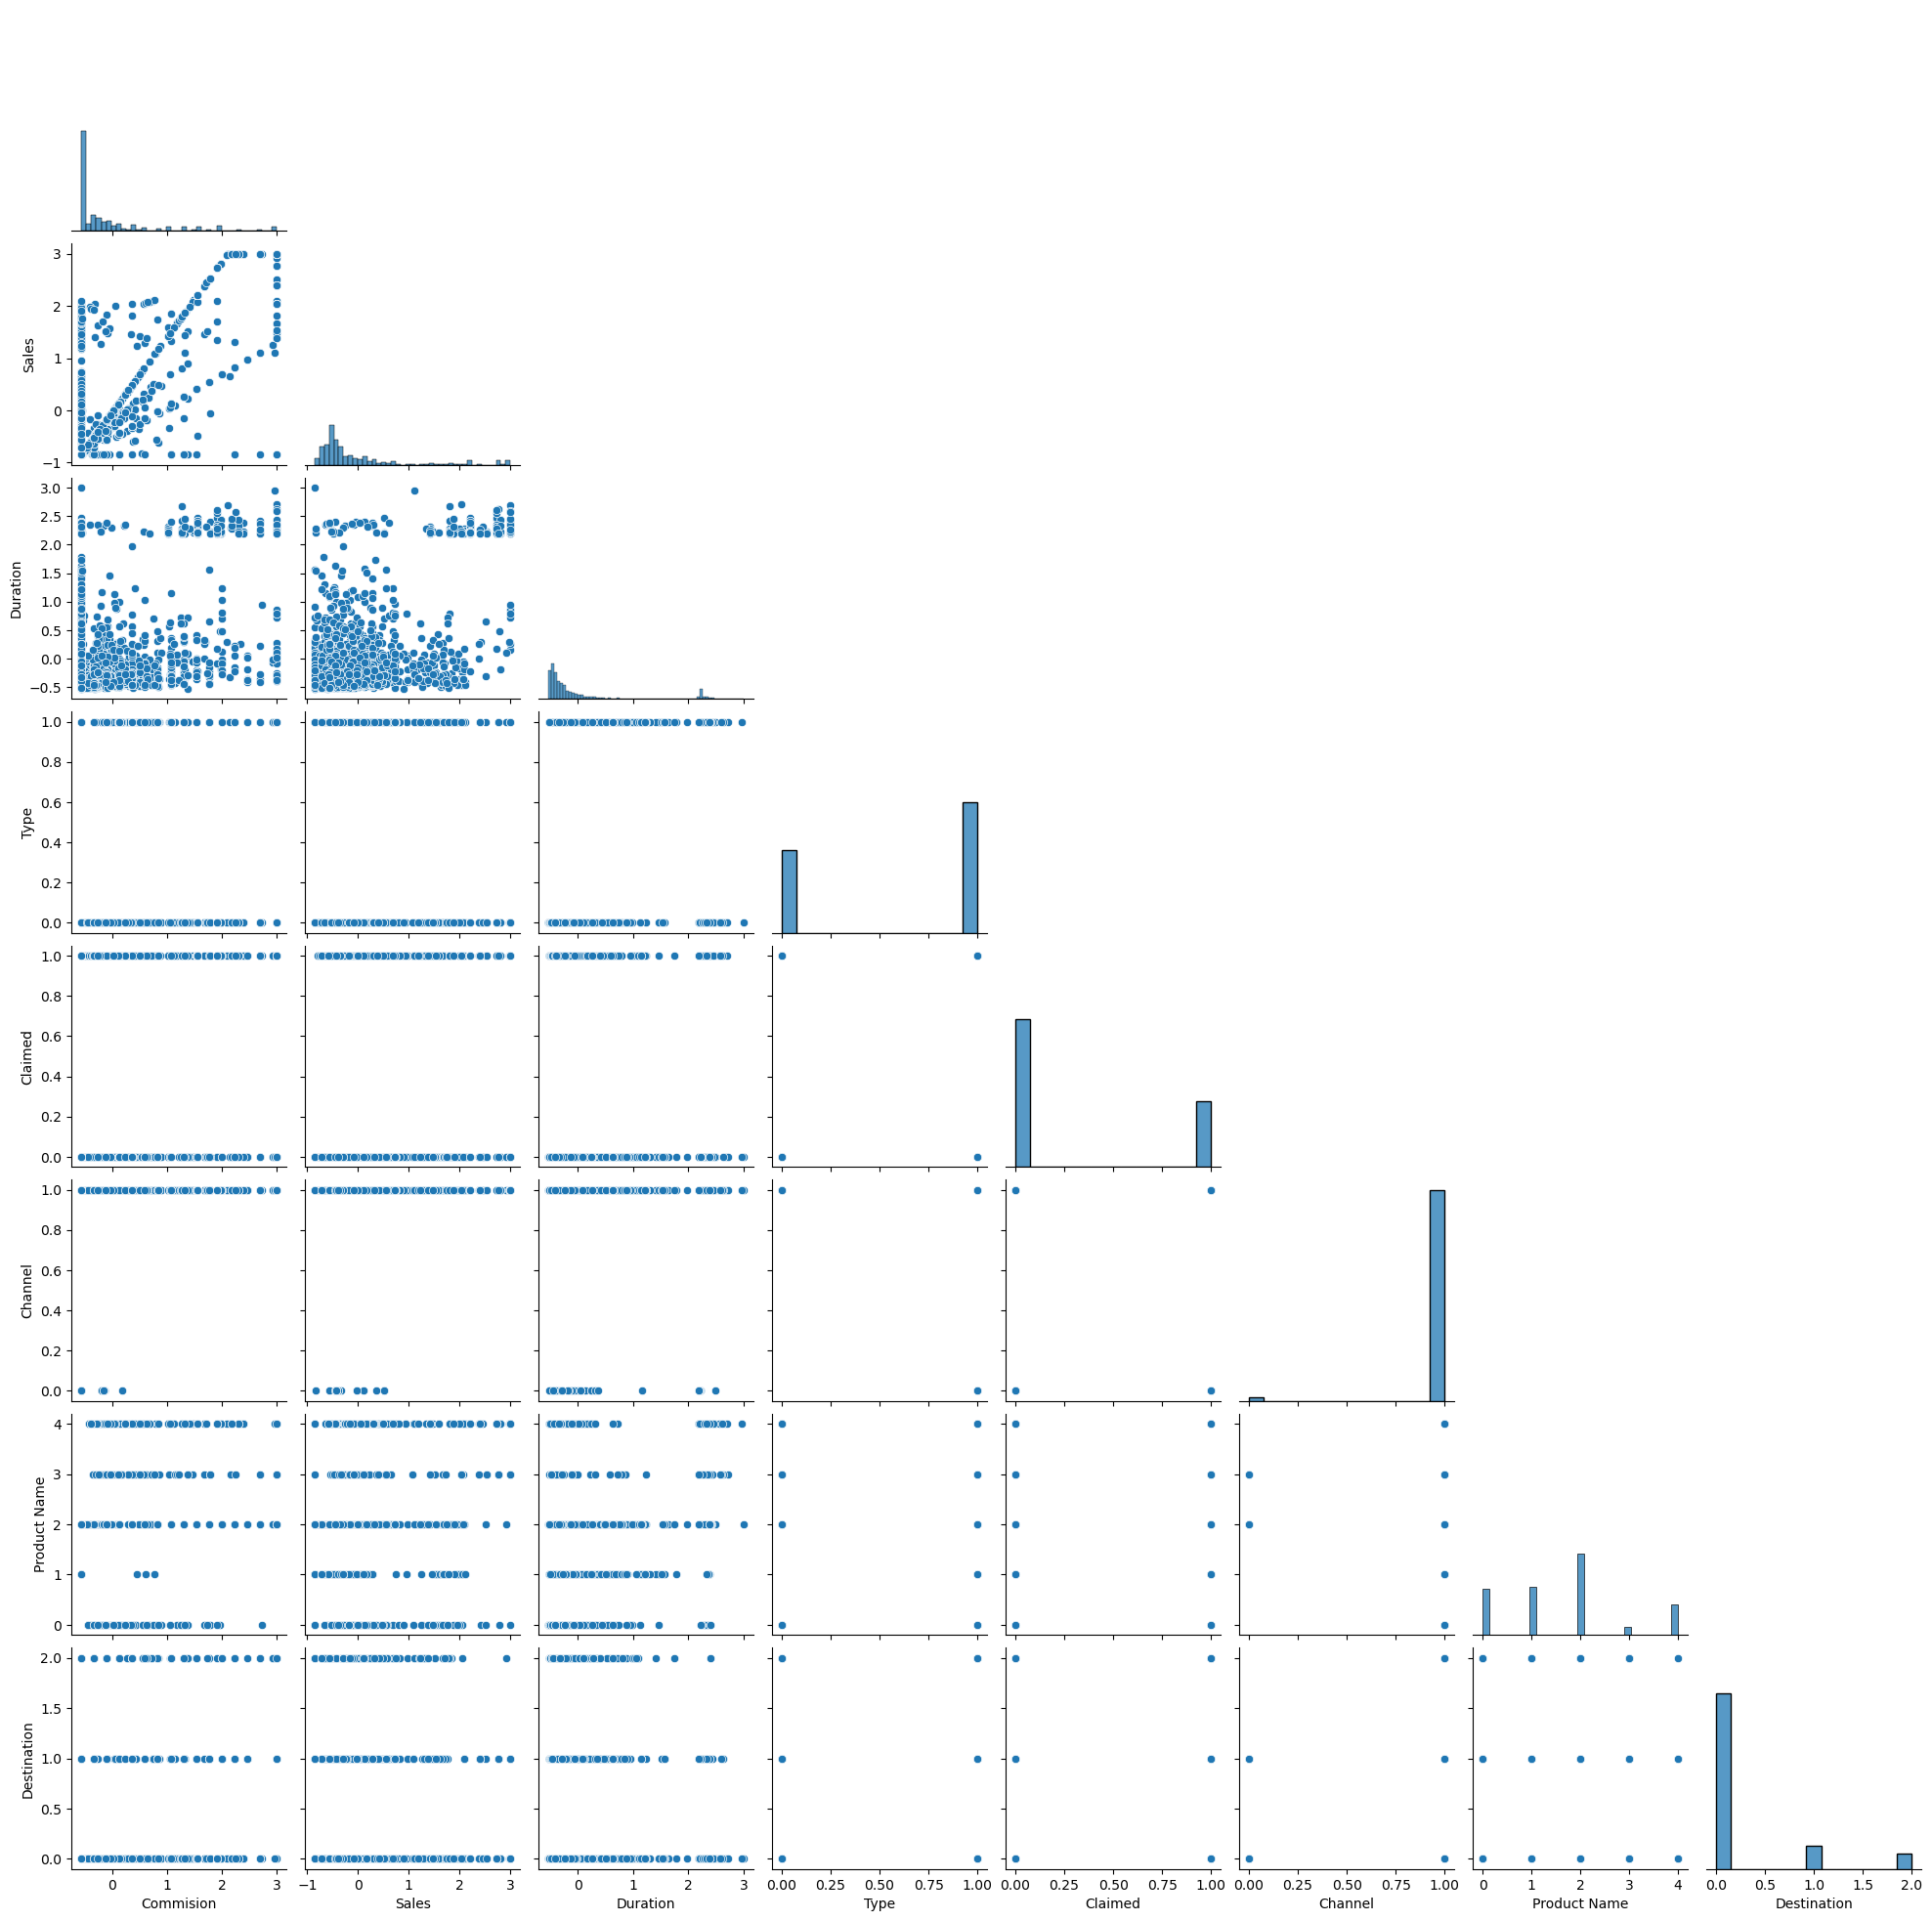

In [69]:
plt.figure(figsize=(10,10))
sns.pairplot(df1, corner=True);

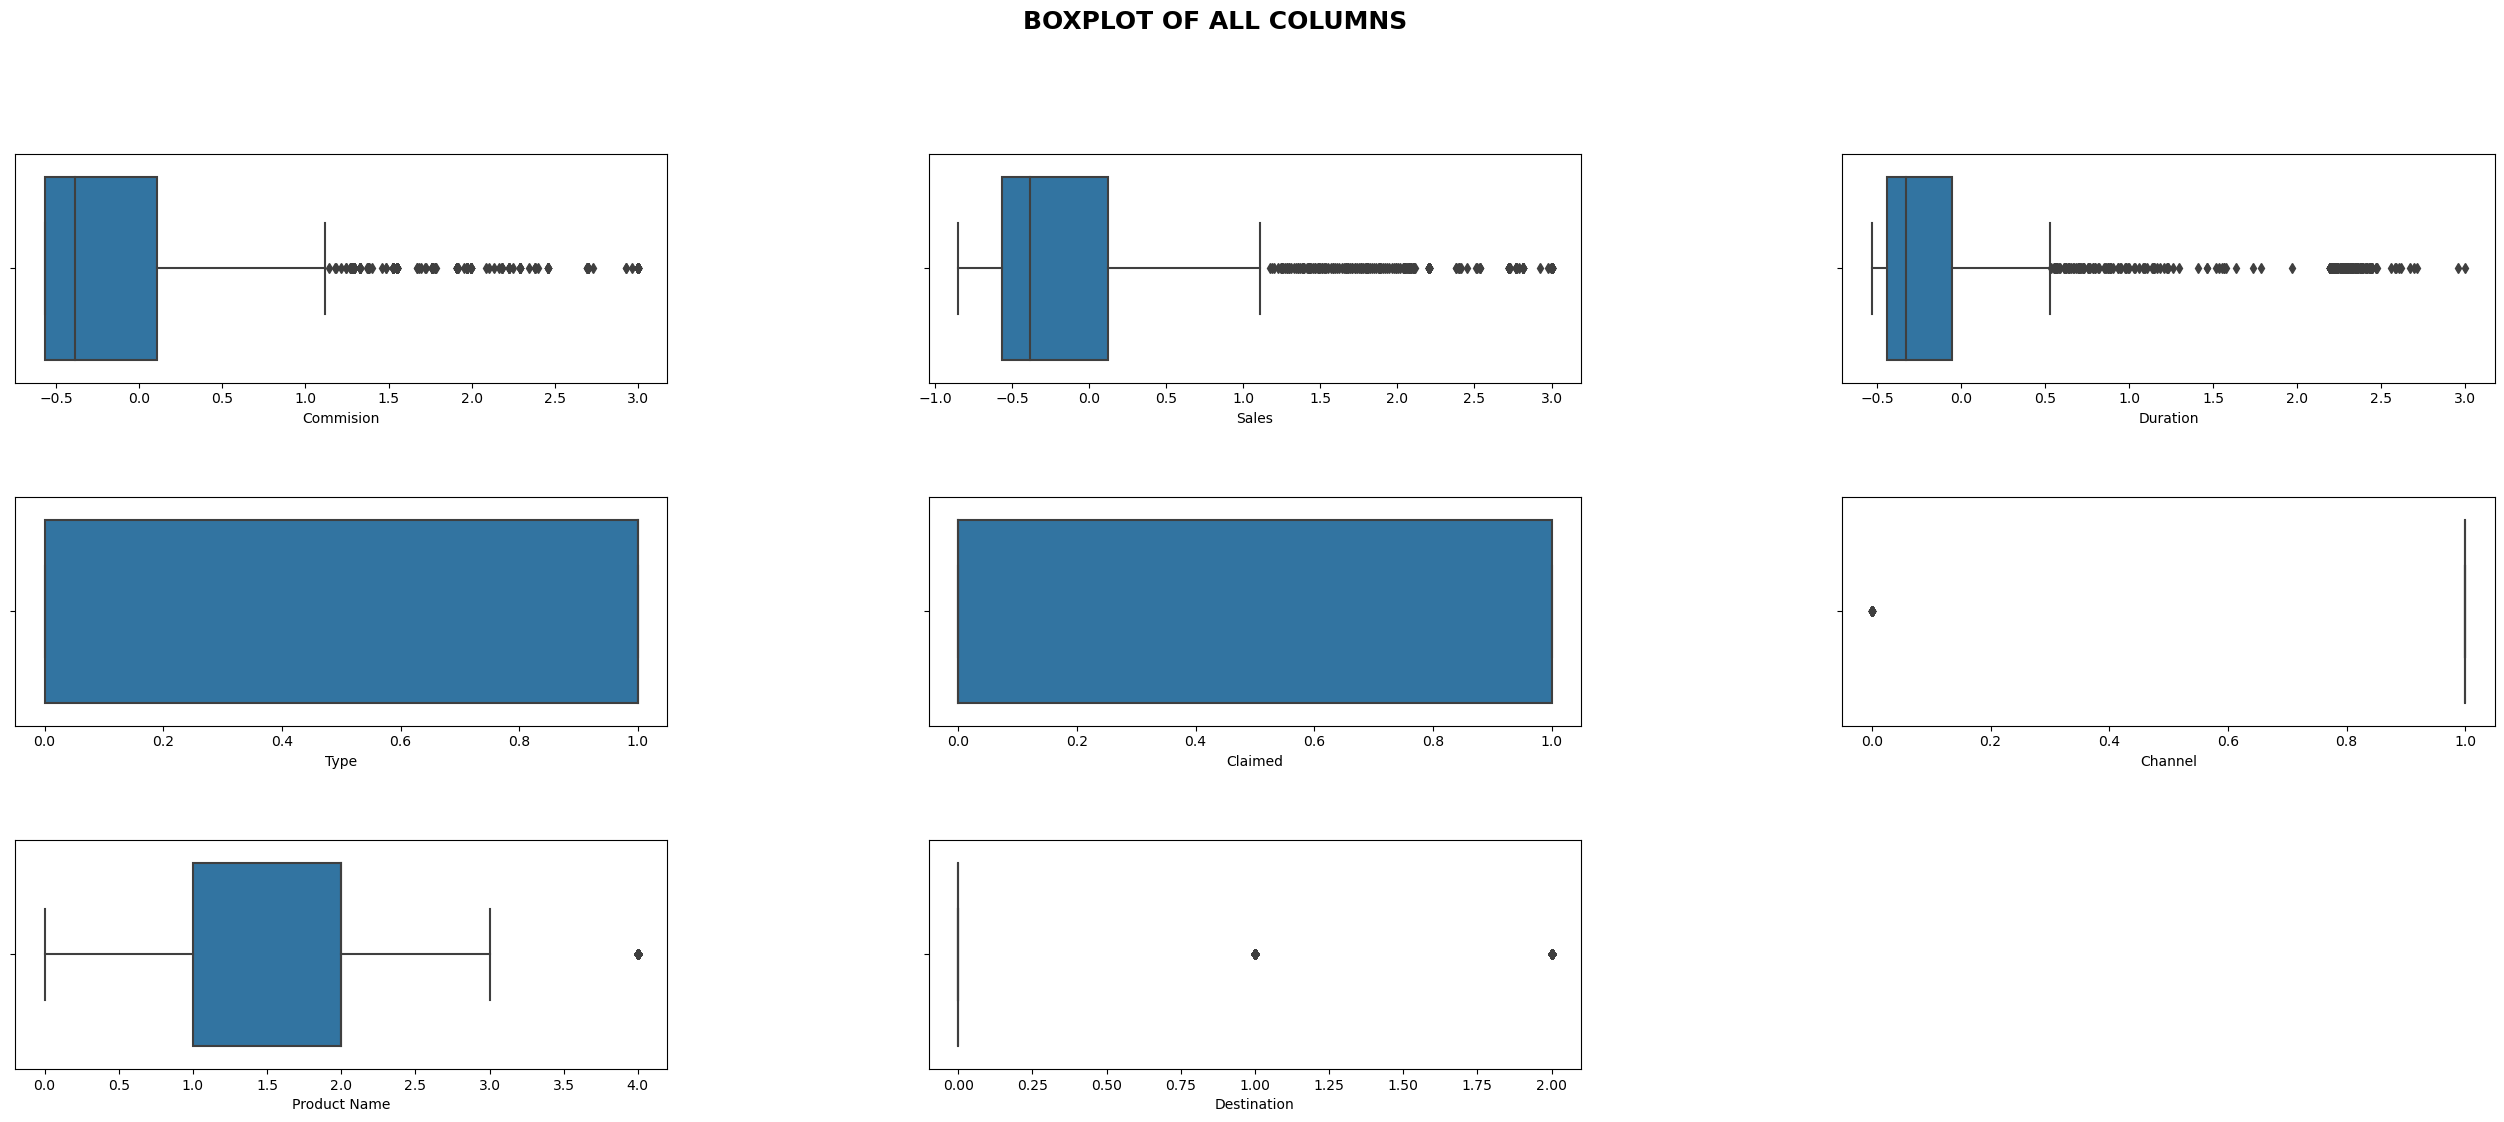

In [70]:
#Outliers in each Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df1):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df1, x=col);

## Pre-processing and Training Data Development


In [ ]:
X=df1.drop('Claimed',axis=1)
Y=df1.pop('Claimed')

In [74]:
X.shape

(3000, 7)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.20,random_state=1)

In [79]:
train_labels.value_counts(normalize=True)


Claimed
0    0.692083
1    0.307917
Name: proportion, dtype: float64

In [82]:


#Defining function to plot confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score

def plot_model_evaluation(model, X_train, train_labels, X_test, test_labels, model_name):
    # Confusion Matrix
    cm_train = confusion_matrix(train_labels, model.predict(X_train))
    cm_test = confusion_matrix(test_labels, model.predict(X_test))
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    # Train Data
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
    axes[0].set_title(f"Confusion Matrix ({model_name} - Train Data)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    # Test Data
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
    axes[1].set_title(f"Confusion Matrix ({model_name} - Test Data)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    # Annotate TP, TN, FP, FN
    for i, cm in enumerate([cm_train, cm_test]):
        axes[i].annotate("TP", xy=(1.45, 1.7), fontsize=10, color='black', va='center')
        axes[i].annotate("TN", xy=(0.45, 0.7), fontsize=10, color='white', va='center')
        axes[i].annotate("FP", xy=(1.45, 0.7), fontsize=10, color='black', va='center')
        axes[i].annotate("FN", xy=(0.45, 1.7), fontsize=10, color='black', va='center')
    plt.tight_layout()
    plt.show()
    # ROC curve
    train_labels_predict_prob = model.predict_proba(X_train)
    probs_train = train_labels_predict_prob[:, 1]
    auc_train = roc_auc_score(train_labels, probs_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(train_labels, probs_train)
    test_labels_predict_prob = model.predict_proba(X_test)
    probs_test = test_labels_predict_prob[:, 1]
    auc_test = roc_auc_score(test_labels, probs_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(test_labels, probs_test)
    plt.figure(figsize=(9, 4))
    # ROC curve of training data
    plt.subplot(1, 2, 1)
    plt.title(f'ROC Curve {model_name} Train Data')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.text(0.6, 0.3, f'AUC = {round(auc_train, 2)}', fontsize=10)
    # ROC curve of testing data
    plt.subplot(1, 2, 2)
    plt.title(f'ROC Curve {model_name} Test Data')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_test, tpr_test, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.text(0.6, 0.3, f'AUC = {round(auc_test, 2)}', fontsize=10)
    plt.tight_layout()
    plt.show()
